# Conjunto de ejercicios
## Ejercicio 6
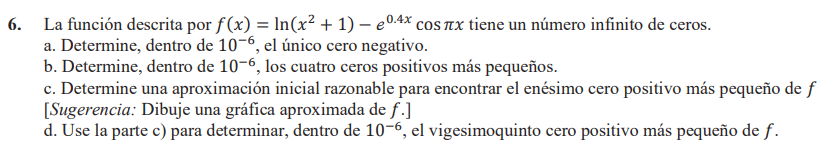

a) No se encontró un cero negativo en [-1.5, -0.5]

b) Cuatro ceros positivos más pequeños:
  Cero #1: x ≈ 5.619935


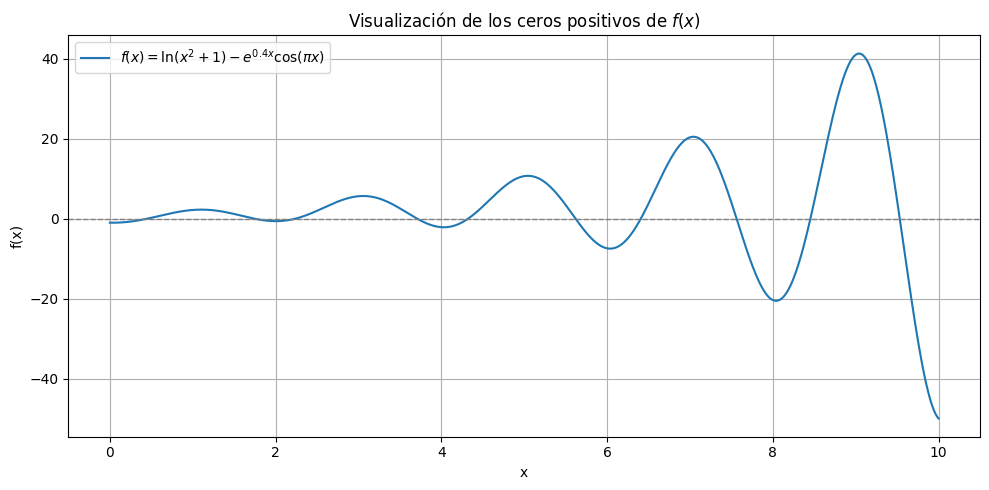


c) Aproximación inicial para el n-ésimo cero: x_n ≈ n
d) No se encontró el cero número 25 en [24.6, 25.4]


In [7]:
import numpy as np
from scipy.optimize import brentq
import matplotlib.pyplot as plt

# -----------------------------
# Definir la función f(x)
# -----------------------------
def f(x):
    return np.log(x**2 + 1) - np.exp(0.4 * x) * np.cos(np.pi * x)

# -----------------------------
# a) Único cero negativo (en [-1.5, -0.5])
# -----------------------------
try:
    zero_neg = brentq(f, -1.5, -0.5, xtol=1e-6)
    print(f"a) Único cero negativo: x ≈ {zero_neg:.6f}")
except ValueError:
    print("a) No se encontró un cero negativo en [-1.5, -0.5]")

# -----------------------------
# b) Primeros 4 ceros positivos
# Buscar cerca de los enteros: [n - 0.4, n + 0.4]
# -----------------------------
print("\nb) Cuatro ceros positivos más pequeños:")
zeros_pos = []
n = 1
while len(zeros_pos) < 4 and n < 20:  # límite de seguridad
    a = n - 0.4
    b = n + 0.4
    try:
        root = brentq(f, a, b, xtol=1e-6)
        # Evita raíces duplicadas
        if not zeros_pos or abs(root - zeros_pos[-1]) > 1e-4:
            zeros_pos.append(root)
            print(f"  Cero #{len(zeros_pos)}: x ≈ {root:.6f}")
    except ValueError:
        pass  # No raíz en este intervalo
    n += 1

# -----------------------------
# c) Gráfico en intervalo positivo (por ejemplo, de 0 a 10)
# -----------------------------
x_vals = np.linspace(0, 10, 1000)
y_vals = f(x_vals)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label=r"$f(x) = \ln(x^2 + 1) - e^{0.4x} \cos(\pi x)$")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Visualización de los ceros positivos de $f(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
print("\nc) Aproximación inicial para el n-ésimo cero: x_n ≈ n")

# -----------------------------
# d) Cero positivo número 25: buscar en [24.6, 25.4]
# -----------------------------
try:
    zero_25 = brentq(f, 24.6, 25.4, xtol=1e-6)
    print(f"\nd) Cero positivo #25: x ≈ {zero_25:.6f}")
except ValueError:
    print("d) No se encontró el cero número 25 en [24.6, 25.4]")


